In [17]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
from model_comparer import ModelComparer
import warnings
from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False

warnings.filterwarnings('ignore')
from plotting_utils import fig_saver, legend_outside, dual_plot
import gas_phase_data
import numpy as np
import apogee_analysis as aah
from vice_utils import load_model
from matplotlib import animation

In [19]:
import sys
sys.path.append("../")
import surp

import vice
import pickle
# from vice_to_pickle import vice_model, pickle_output
import pandas as pd
from dataclasses import dataclass
import rc_params

In [20]:
def plot_movie(df, x, y, tlabel=None, savefile=None, dpi=100, **kwargs):
    fig = plt.figure()
    ax = plt.axes(xlim=(-1.5, 1), ylim=(-0.5, 0.5))
    line = ax.scatter([], [])
    ax.set(
        xlabel=x,
        ylabel=y
    )
    plt.tight_layout()
    
    def init():
        line.set_data([], [])
        return line,
    
    
    def animate(i):

        t = i/10
        
        xt = df.loc[t][x]
        yt = df.loc[t][y]
        ct = df.loc[t].index
                
        line.set_offsets([(a, b) for a, b in zip(xt, yt)])
        line.set_array(ct)
        
        ax.set_title("%s = %1.2f Gyr" % (tlabel,t))
        return line,

    
    ani = animation.FuncAnimation(fig, animate, interval=50, frames=130)

    # converting to an html5 video
    # video = ani.to_html5_video()

    # embedding for the video
    #html = display.HTML(video)

    # draw the animation
    # display.display(html)
    
    if savefile is not None:
        writervideo = animation.FFMpegWriter(fps=20)
        ani.save(savefile, writer=writervideo, dpi=dpi)
    plt.close()

In [6]:
h = pd.read_csv("cristallo11_f0.2_Z0.3_eta1_v0.1_lateburst.csv", index_col=0)

filt = h["R"] < 15.4
filt &= h["R"] > 2
h = h[filt]
h.set_index(["time", "R"], inplace=True)


In [49]:
plot_movie(h, "[o/h]", "[c/o]", "T", savefile="lateburst.gif")

In [109]:
plot_movie(h, "[o/fe]", "[c/o]", "T", savefile="lateburst_fe.gif")

In [22]:
def plot_movie(savefile=None, dpi=100, dt=0.1, fps=20, **kwargs):
    
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    
    t = 0.01
    o_h = h.loc[t]["[o/h]"]
    c_o = h.loc[t]["[c/o]"]
    o_fe = h.loc[t]["[o/fe]"]
    R = h.loc[t].index
    line = axs[0].scatter(o_h, c_o, c=o_h, vmin=-1, vmax=0.5, cmap="jet")
    axs[0].set(
        xlabel="[O/H]",
        ylabel="[C/O]",
        xlim=(-1, 1),
        ylim=(-1, 0.6)
    )
    fig.colorbar(line, ax=axs[0], label="[O/H]")
    
    line_fe = axs[1].scatter(o_fe, c_o, c=o_h, vmin=-1, vmax=0.5, cmap="jet")
    axs[1].set(
        xlabel="[O/Fe]",
        ylabel="[C/O]",
        xlim=(-0.2, 0.6),
        ylim=(-1, 0.6)
    )
    # fig.colorbar(line_fe, ax=axs[1], label="[O/H]")
    

    df = h.groupby(level=0).mean()
    axs[2].plot(df.index, df["sfr"])
    axs[2].set(
        xlabel="t/Gyr",
        ylabel="SFR"
    )
    
    t = 0.01
    y0 = df["sfr"][t]
    
    t_lines, = axs[2].plot([t, t, 0], [0, y0, y0], ls="--", color="k")
    t_marker = axs[2].scatter(t, y0, s=100, zorder=3)
    
    
    plt.tight_layout()
    
    def init():
        line.set_data([], [])
        return line,
    

    def animate(i, line, line_fe, t_lines, t_marker):

        t = np.round(i*dt, 2)
        print("\r", "t = ", t, end="")
        
        o_h = h.loc[t]["[o/h]"]
        c_o = h.loc[t]["[c/o]"]
        o_fe = h.loc[t]["[o/fe]"]
        R = h.loc[t].index
        
                
        line.set_offsets([(a, b) for a, b in zip(o_h, c_o)])
        line.set_array(o_h)
        s = 3*R
        # line.set_sizes(s)
        line_fe.set_offsets([(a, b) for a, b in zip(o_fe, c_o)])
        line_fe.set_array(o_h)
        # line_fe.set_sizes(s)

        y0 = df["sfr"][t]
        t_lines.set_data([t, t, 0], [0, y0, y0])
        t_marker.set_offsets((t, y0))
        
        plt.suptitle("t = %1.2f Gyr" % (t))
        
        return line,

    
    ani = animation.FuncAnimation(fig, animate, fargs=(line, line_fe, t_lines, t_marker),
                                  interval=1000/fps, frames=int(13.2/dt))
    print(ani)
    # converting to an html5 video
    # video = ani.to_html5_video()

    # embedding for the video
    #html = display.HTML(video)

    # draw the animation
    # display.display(html)
    
    if savefile is not None:
        writervideo = animation.FFMpegWriter(fps=fps)
        ani.save(savefile, writer=writervideo, dpi=dpi)
    plt.close()

In [13]:
plot_movie(savefile="lateburst_all.gif")

 t =  13.0

 t =  2.95

MovieWriter stderr:
[image2 @ 0x55bf33f04100] Cannot write more than one file with the same name. Are you missing the -update option or a sequence pattern?
av_interleaved_write_frame(): Invalid argument
[image2 @ 0x55bf33f04100] Cannot write more than one file with the same name. Are you missing the -update option or a sequence pattern?
av_interleaved_write_frame(): Invalid argument
[image2 @ 0x55bf33f04100] Cannot write more than one file with the same name. Are you missing the -update option or a sequence pattern?
av_interleaved_write_frame(): Invalid argument
[image2 @ 0x55bf33f04100] Cannot write more than one file with the same name. Are you missing the -update option or a sequence pattern?
av_interleaved_write_frame(): Invalid argument
[image2 @ 0x55bf33f04100] Cannot write more than one file with the same name. Are you missing the -update option or a sequence pattern?
av_interleaved_write_frame(): Invalid argument
[image2 @ 0x55bf33f04100] Cannot write more than one file with th

CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '1500x500', '-pix_fmt', 'rgba', '-r', '100', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', 'lateburst_all2.jpeg']' returned non-zero exit status 1.

 t =  0.0

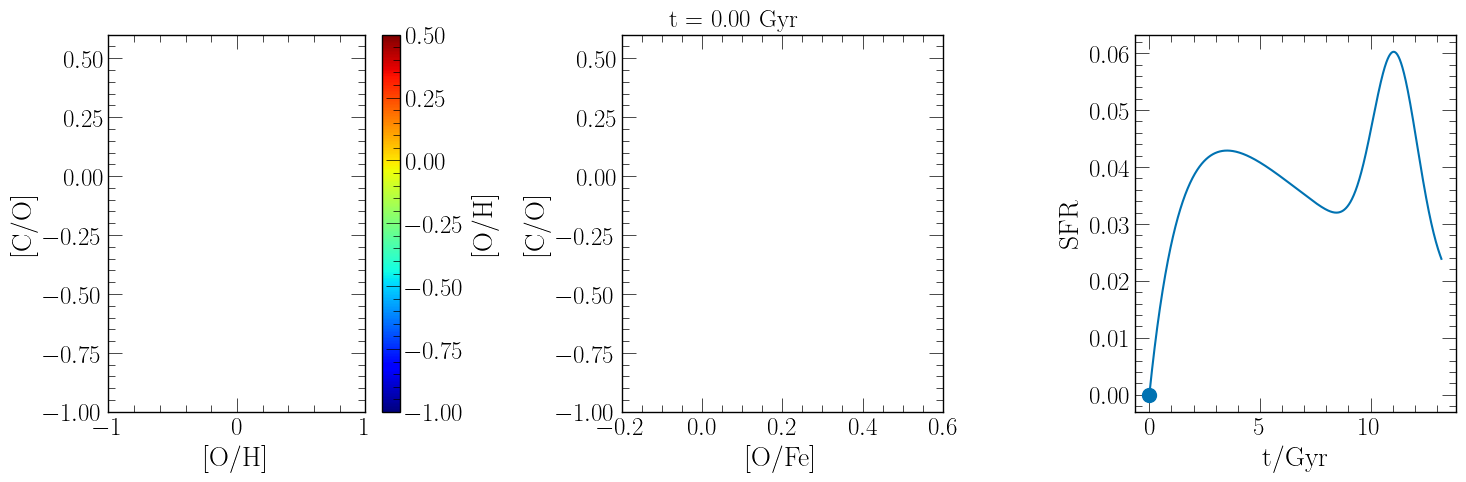

In [23]:
plot_movie(savefile="lateburst_all2.jpeg", dt=0.05, fps=100)

 t =  3.66

MovieWriter stderr:
Error writing trailer of lateburst_all_hr.gif: Invalid argument



CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '1500x500', '-pix_fmt', 'rgba', '-r', '20', '-loglevel', 'error', '-i', 'pipe:', '-filter_complex', 'split [a][b];[a] palettegen [p];[b][p] paletteuse', '-y', 'lateburst_all_hr.gif']' returned non-zero exit status 255.

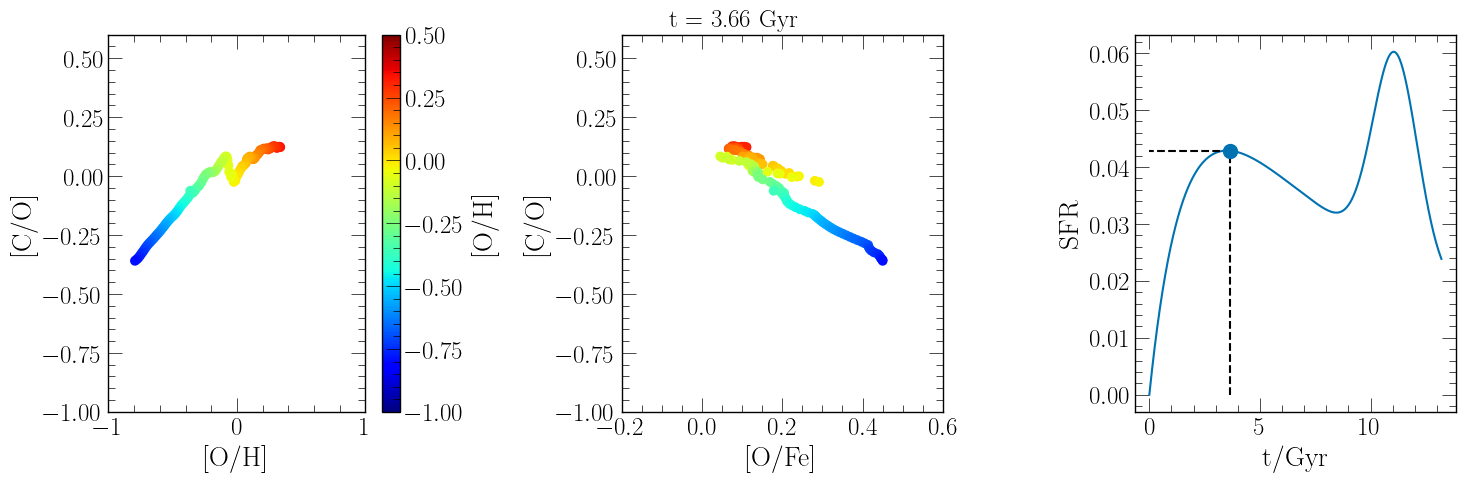

In [16]:
plot_movie(savefile="lateburst_all_hr.gif", dt=0.01, fps=100)